In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("data/train_loan.csv")
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [184]:
data.shape

(614, 13)

In [185]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [186]:
data['Loan_Status'].value_counts(normalize = True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

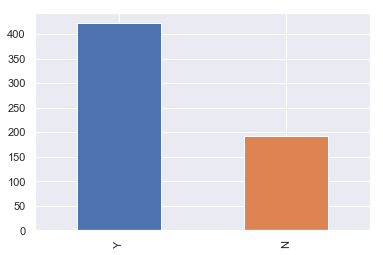

In [187]:
data['Loan_Status'].value_counts().plot.bar()

Text(0.5, 1.0, 'Credit_History')

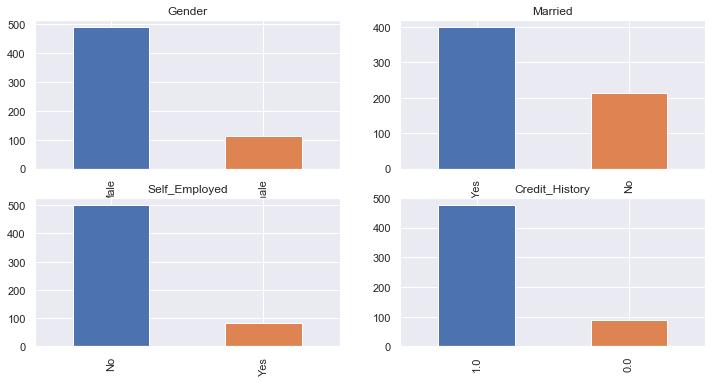

In [188]:
f,ax=plt.subplots(2,2,figsize=(12,6))
data['Gender'].value_counts().plot.bar(ax = ax[0,0])
ax[0,0].set_title('Gender')
data['Married'].value_counts().plot.bar(ax = ax[0,1])
ax[0,1].set_title('Married')
data['Self_Employed'].value_counts().plot.bar(ax = ax[1,0])
ax[1,0].set_title('Self_Employed')
data['Credit_History'].value_counts().plot.bar(ax = ax[1,1])
ax[1,1].set_title('Credit_History')

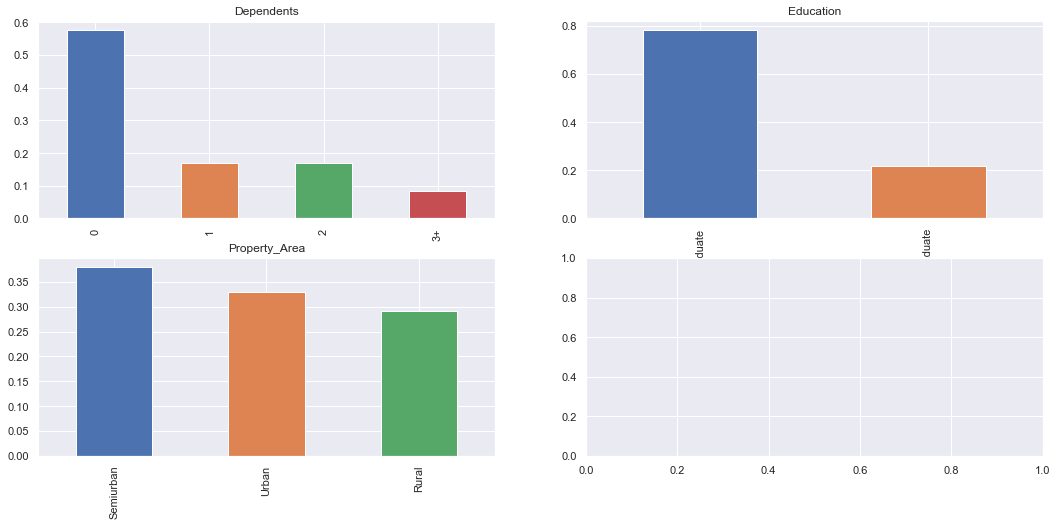

In [189]:
f,ax=plt.subplots(2,2,figsize=(18,8))
data['Dependents'].value_counts(normalize = True).plot.bar(ax= ax[0,0],title = 'Dependents')
data['Education'].value_counts(normalize = True).plot.bar(ax = ax[0,1],title = 'Education')
data['Property_Area'].value_counts(normalize = True).plot.bar(ax = ax[1,0],title = 'Property_Area')
plt.show()

In [190]:
plt.figure(1) plt.subplot(121) sns.distplot(train['ApplicantIncome']); 
plt.subplot(122) train['ApplicantIncome'].plot.box(figsize=(16,5)) 
plt.show

SyntaxError: invalid syntax (<ipython-input-190-ee16aefa6eb3>, line 1)

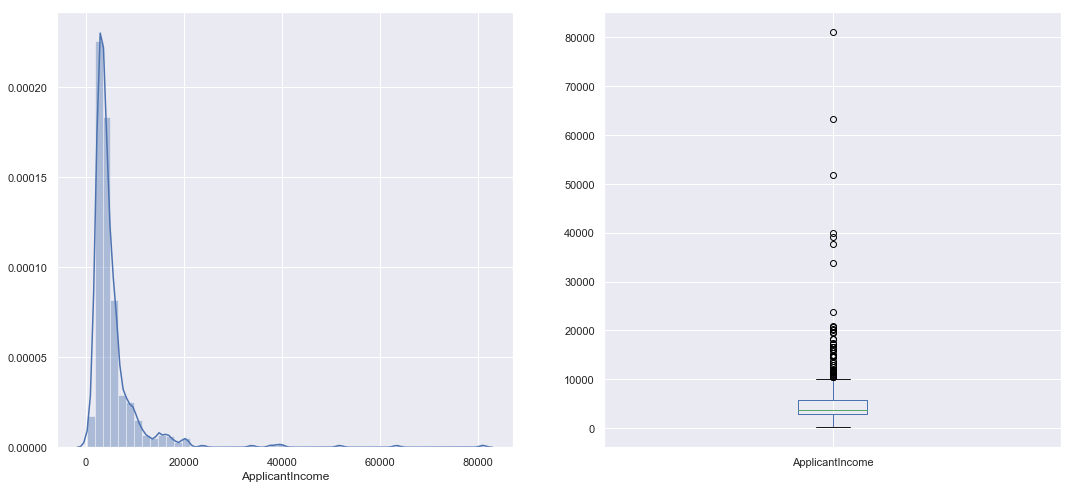

In [191]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.distplot(data['ApplicantIncome'],ax=ax[0])
data['ApplicantIncome'].plot.box(ax = ax[1])


Text(0.5, 0.98, '')

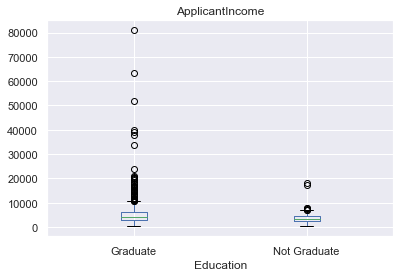

In [192]:
data.boxplot(column = 'ApplicantIncome', by = 'Education')
plt.suptitle("")

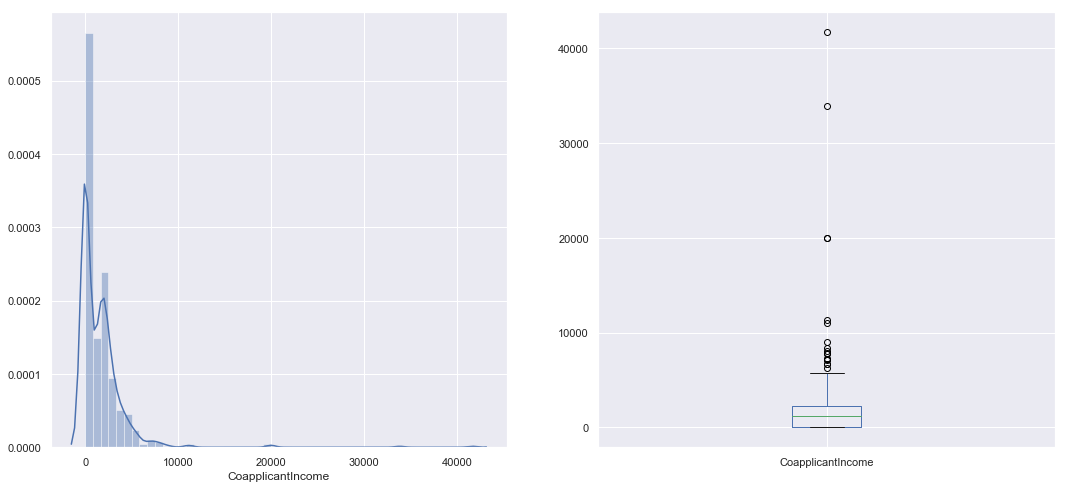

In [193]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.distplot(data['CoapplicantIncome'],ax=ax[0])
data['CoapplicantIncome'].plot.box(ax = ax[1])


In [194]:
df = data.dropna()

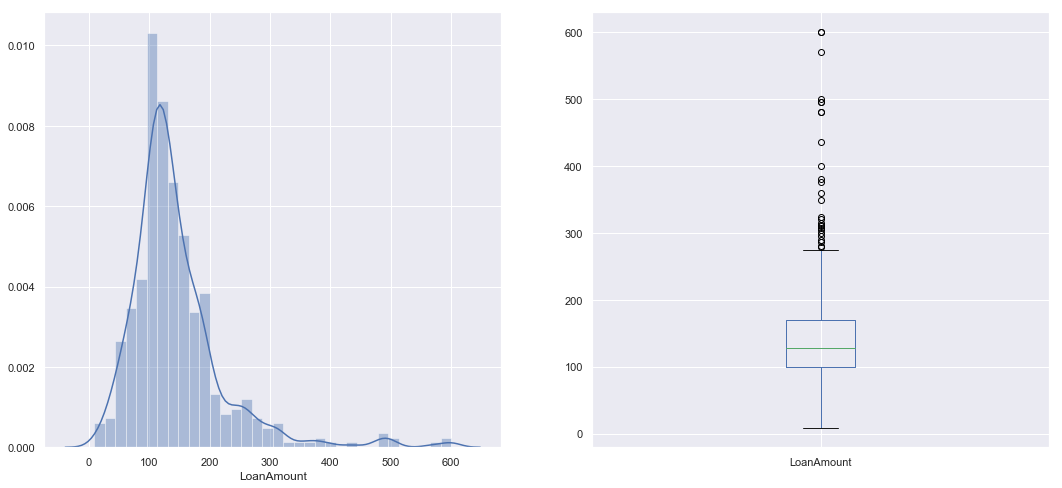

In [195]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.distplot(df['LoanAmount'],ax=ax[0])
df['LoanAmount'].plot.box(ax = ax[1])

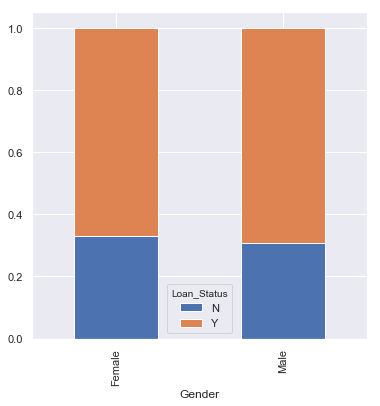

In [196]:
Gender = pd.crosstab(data['Gender'],data['Loan_Status']) 
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6,6))

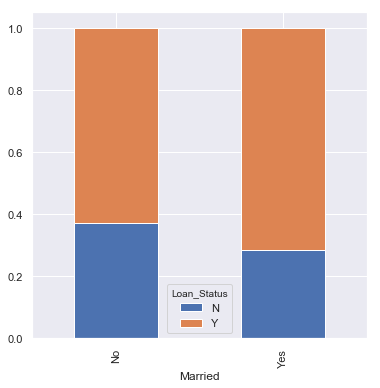

In [197]:
Married=pd.crosstab(data['Married'],data['Loan_Status'])
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6,6)) 

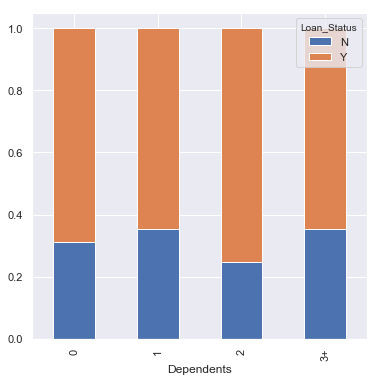

In [198]:
Dependents=pd.crosstab(data['Dependents'],data['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True,figsize = (6,6))

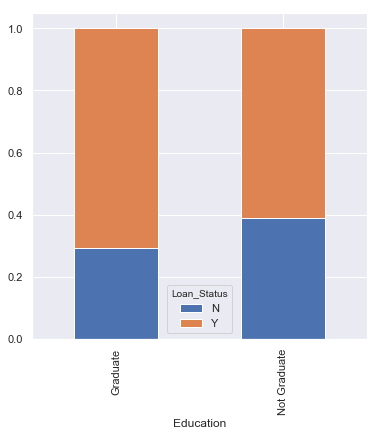

In [199]:
Education=pd.crosstab(data['Education'],data['Loan_Status'])
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6,6))

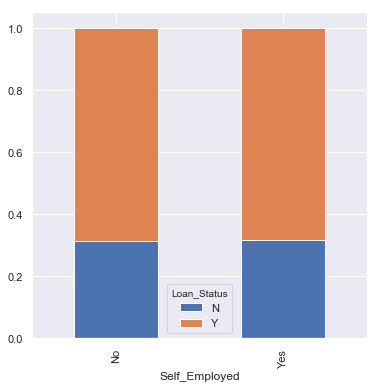

In [200]:
Self_Employed=pd.crosstab(data['Self_Employed'],data['Loan_Status'])  
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6,6)) 

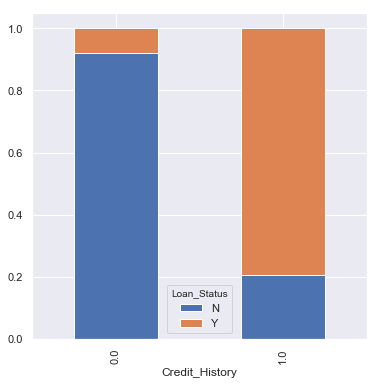

In [201]:
Credit_History=pd.crosstab(data['Credit_History'],data['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6,6))

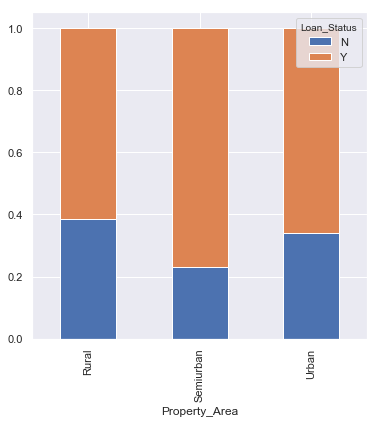

In [202]:
Property_Area=pd.crosstab(data['Property_Area'],data['Loan_Status']) 
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True,figsize = (6,6))

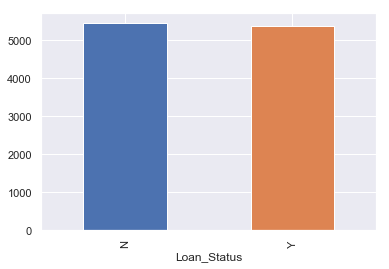

In [203]:
data.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

Text(0, 0.5, 'Percentage')

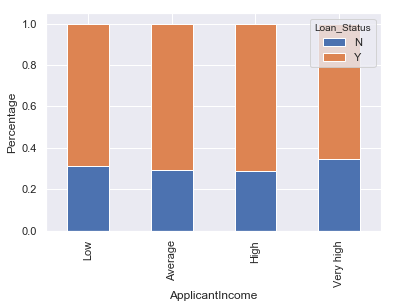

In [204]:
bins=[0,2500,4000,6000,81000] 
group=['Low','Average','High', 'Very high'] 
data['Income_bin']=pd.cut(df['ApplicantIncome'],bins,labels=group)
Income_bin=pd.crosstab(data['Income_bin'],data['Loan_Status']) 
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('ApplicantIncome') 
plt.ylabel('Percentage')


Text(0, 0.5, 'Percentage')

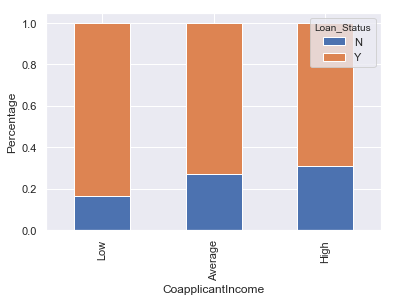

In [205]:
bins=[0,1000,3000,42000] 
group=['Low','Average','High']
data['Coapplicant_Income_bin']=pd.cut(df['CoapplicantIncome'],bins,labels=group)
Coapplicant_Income_bin=pd.crosstab(data['Coapplicant_Income_bin'],data['Loan_Status']) 
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('CoapplicantIncome') 
plt.ylabel('Percentage')

Text(0, 0.5, 'percentage')

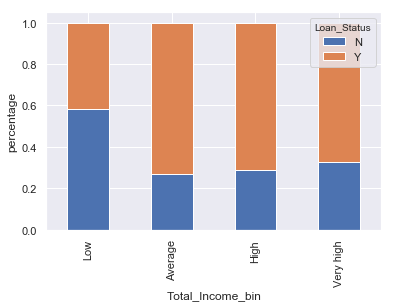

In [206]:
data['Total_Income']=data['ApplicantIncome']+data['CoapplicantIncome']
bins=[0,2500,4000,6000,81000] 
group=['Low','Average','High', 'Very high'] 
data['Total_Income_bin']=pd.cut(data['Total_Income'],bins,labels=group)
Total_Income_bin=pd.crosstab(data['Total_Income_bin'],data['Loan_Status']) 
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked = True) 
plt.ylabel("percentage")

Text(0, 0.5, 'Percentage')

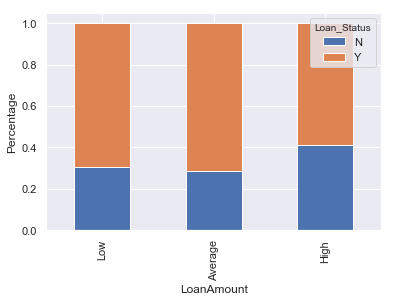

In [207]:
bins=[0,100,200,700] 
group=['Low','Average','High'] 
data['LoanAmount_bin']=pd.cut(df['LoanAmount'],bins,labels=group)
LoanAmount_bin=pd.crosstab(data['LoanAmount_bin'],data['Loan_Status']) 
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('LoanAmount') 
plt.ylabel('Percentage')

In [208]:
data=data.drop(['Income_bin', 'Coapplicant_Income_bin', 'LoanAmount_bin', 'Total_Income_bin', 'Total_Income'], axis=1)

In [209]:
data['Dependents'].replace('3+', 3,inplace=True)
data['Loan_Status'].replace('N', 0,inplace=True) 
data['Loan_Status'].replace('Y', 1,inplace=True)

In [210]:
data.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715,-0.004710
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056,-0.059187
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433,-0.037318
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470,-0.021268
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000,0.561678
Loan_Status,-0.004710,-0.059187,-0.037318,-0.021268,0.561678,1.000000


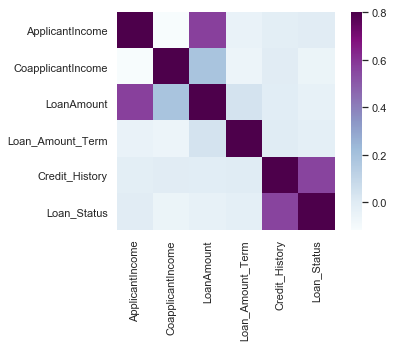

In [211]:
matrix = data.corr() 
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu")

In [212]:
data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)

In [213]:
data['Married'].fillna(data['Married'].mode()[0], inplace = True)

In [214]:
data['Dependents'].fillna(data['Dependents'].mode()[0], inplace = True)

In [215]:
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0],inplace = True)

In [216]:
data['Credit_History'].fillna(data['Credit_History'].mode()[0],inplace = True)

In [217]:
data['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

Since 368 ocuurs most of the time i.e 368 is the mode value 

In [218]:
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0],inplace = True)

In [219]:
data['LoanAmount'].fillna(data['LoanAmount'].median(), inplace=True)

In [220]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               614 non-null object
Married              614 non-null object
Dependents           614 non-null object
Education            614 non-null object
Self_Employed        614 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     614 non-null float64
Credit_History       614 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null int64
dtypes: float64(4), int64(2), object(7)
memory usage: 62.4+ KB


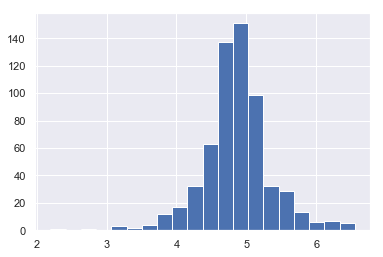

In [221]:
data['LoanAmount_log'] = np.log(data['LoanAmount']) 
data['LoanAmount_log'].hist(bins=20)

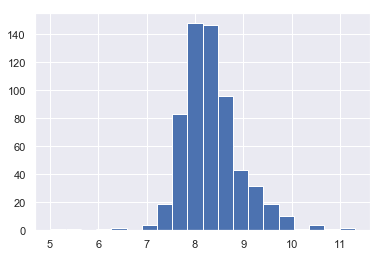

In [222]:
data['ApplicantIncome_log'] = np.log(data['ApplicantIncome'])
data['ApplicantIncome_log'].hist(bins = 20)


In [223]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,ApplicantIncome_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1,4.852030,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0,4.852030,8.430109
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1,4.189655,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1,4.787492,7.856707
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1,4.948760,8.699515


In [226]:
data = data.drop(['Loan_ID'],axis = 1)

### Feature engineering : 

In [228]:
data['Total_Income']=data['ApplicantIncome']+data['CoapplicantIncome'] 

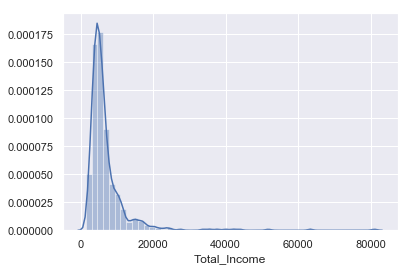

In [230]:
sns.distplot(data['Total_Income'])

As the distribution is skewed towards right , so we take here log transformation of Total_Income

In [231]:
data['Total_Income_log'] = np.log(data['Total_Income']) 

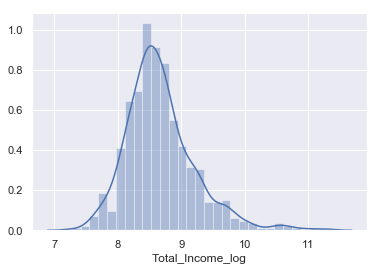

In [232]:
sns.distplot(data['Total_Income_log'])

In [233]:
data['EMI']=data['LoanAmount']/data['Loan_Amount_Term']

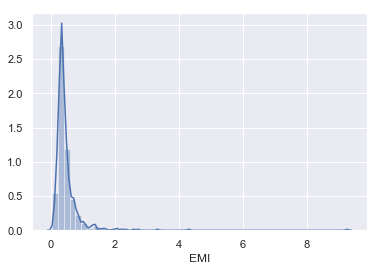

In [234]:
sns.distplot(data['EMI'])

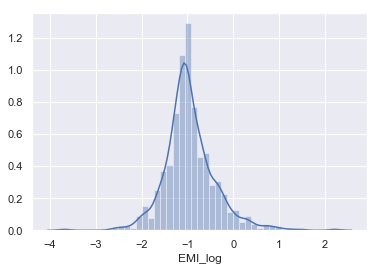

In [241]:
data['EMI_log'] = np.log(data['EMI']) 
sns.distplot(data["EMI_log"])

In [237]:
data['Balance Income']=data['Total_Income']-(data['EMI']*1000)

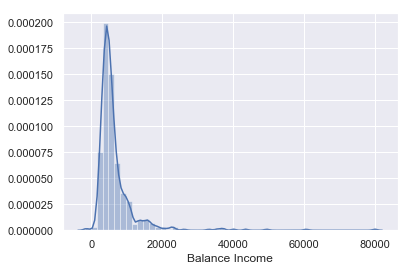

In [238]:
sns.distplot(data['Balance Income'])

In [243]:
data=data.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1) 

In [245]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,LoanAmount_log,ApplicantIncome_log,Total_Income,Total_Income_log,EMI,Balance Income,EMI_log
0,Male,No,0,Graduate,No,1.0,Urban,1,4.852030,8.674026,5849.0,8.674026,0.355556,5493.444444,-1.034074
1,Male,Yes,1,Graduate,No,1.0,Rural,0,4.852030,8.430109,6091.0,8.714568,0.355556,5735.444444,-1.034074
2,Male,Yes,0,Graduate,Yes,1.0,Urban,1,4.189655,8.006368,3000.0,8.006368,0.183333,2816.666667,-1.696449
3,Male,Yes,0,Not Graduate,No,1.0,Urban,1,4.787492,7.856707,4941.0,8.505323,0.333333,4607.666667,-1.098612
4,Male,No,0,Graduate,No,1.0,Urban,1,4.948760,8.699515,6000.0,8.699515,0.391667,5608.333333,-0.937344


In [246]:
data = pd.get_dummies(data)

In [247]:
data.head()

,Credit_History,Loan_Status,LoanAmount_log,ApplicantIncome_log,Total_Income,Total_Income_log,EMI,Balance Income,EMI_log,Gender_Female,...,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1.0,1,4.852030,8.674026,5849.0,8.674026,0.355556,5493.444444,-1.034074,0,...,1,0,0,1,0,1,0,0,0,1
1,1.0,0,4.852030,8.430109,6091.0,8.714568,0.355556,5735.444444,-1.034074,0,...,0,1,0,1,0,1,0,1,0,0
2,1.0,1,4.189655,8.006368,3000.0,8.006368,0.183333,2816.666667,-1.696449,0,...,1,0,0,1,0,0,1,0,0,1
3,1.0,1,4.787492,7.856707,4941.0,8.505323,0.333333,4607.666667,-1.098612,0,...,1,0,0,0,1,1,0,0,0,1
4,1.0,1,4.948760,8.699515,6000.0,8.699515,0.391667,5608.333333,-0.937344,0,...,1,0,0,1,0,1,0,0,0,1


In [249]:
X = data.drop('Loan_Status',1) 
Y = data.Loan_Status  

In [252]:
from sklearn.model_selection import train_test_split

In [253]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.3,random_state = 25)

### Logistic Regression : 

In [276]:
from sklearn.linear_model import LogisticRegression

In [277]:
model =  LogisticRegression()

In [278]:
model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [279]:
pred_y = model.predict(x_test)

In [280]:
from sklearn.metrics import accuracy_score

In [281]:
accuracy_score(y_test, pred_y)

0.8054054054054054

### Decision Tree :

In [284]:
from sklearn.tree import DecisionTreeClassifier

In [285]:
model=DecisionTreeClassifier()
model.fit(x_train,y_train)
pred_y=model.predict(x_test)
accuracy_score(y_test,pred_y)

0.7351351351351352

### Random Forests :

In [287]:
from sklearn.ensemble import RandomForestClassifier

In [289]:
model=RandomForestClassifier(n_estimators= 60)
model.fit(x_train,y_train)
pred_y = model.predict(x_test)
accuracy_score(pred_y,y_test)

0.7945945945945946

### Cross Validation :

In [290]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import cross_val_predict 

In [291]:
kfold = KFold(n_splits=10, random_state=22)
means = []
accuracy = []
std = []
classifiers = ['Logistic Regression','Decision Tree','Random Forest']
models = [LogisticRegression(),DecisionTreeClassifier(),
          RandomForestClassifier(n_estimators=60)]
for model in models:
    cv_result = cross_val_score(model,X,Y,cv=kfold,scoring = 'accuracy')
    means.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)

In [292]:
new_models_dataframe = pd.DataFrame({'CV Mean':means,"Std":std},index = classifiers)
new_models_dataframe

,CV Mean,Std
Logistic Regression,0.806319,0.037465
Decision Tree,0.698731,0.026867
Random Forest,0.788525,0.045868


In [293]:
#hyperparameter tuning for random forest: